1、Multiple ensembles shown to work. Analysis of why one ensemble performs better or worse than others. 
2、Analysis of interaction between hyperparameters and ensemble composition. 
3、Analysis of interaction between training/validation/testing and ensembles and hyperparameters. 
4、ROC created and all models/ensembles plotted on the same graph. ROC index calculated.

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

In [23]:
df_data1 = pd.read_csv('ozone_eighthr.csv')
df_data1.replace(['?'],[0], inplace =True)
df_data1.fillna(0, inplace =True)
df_data1.iloc[:3]

,Date,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,...,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,Orzone
0,01/01/1998,0.8,1.8,2.4,2.1,2.0,2.1,1.5,1.7,1.9,...,0.15,10.67,-1.56,5795,-12.1,17.9,10330,-55,0.0,0
1,01/02/1998,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,...,0.48,8.39,3.84,5805,14.05,29,10275,-55,0.0,0
2,01/03/1998,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,...,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0.0,0


In [24]:
df_data2 = pd.read_csv("ozone_onehr.csv")
df_data2.replace(['?'],[0], inplace =True)
df_data2.fillna(0, inplace =True)
df_data2.iloc[:3]

,Date,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,...,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,Orzone
0,01/01/1998,0.8,1.8,2.4,2.1,2.0,2.1,1.5,1.7,1.9,...,0.15,10.67,-1.56,5795,-12.1,17.9,10330,-55,0.0,0
1,01/02/1998,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,...,0.48,8.39,3.84,5805,14.05,29,10275,-55,0.0,0
2,01/03/1998,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,...,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0.0,0


In [25]:
def func(df_data, alpha):
    X_train, X_test, y_train, y_test = train_test_split(\
                            df_data.iloc[:, 1:-1].values, 
                            df_data.iloc[:, -1].values, 
                            test_size=alpha, 
                            random_state=42)
    return X_train, X_test, y_train, y_test

In [26]:
X_train, X_test, y_train, y_test = func(df_data1, 0.4)

In [36]:
 # 拟合XGBoost模型
clf1 = XGBClassifier(max_depth=3, 
                     learning_rate=0.1, 
                     n_estimators=100, 
                     verbosity=1, 
                     objective='binary:logistic', 
                     booster='gbtree', 
                     tree_method='auto', 
                     n_jobs=4, 
                     gamma=0, 
                     min_child_weight=1, 
                     max_delta_step=0, 
                     subsample=1, 
                     colsample_bytree=1, 
                     colsample_bylevel=1, 
                     colsample_bynode=1, 
                     reg_alpha=0, 
                     reg_lambda=1, 
                     scale_pos_weight=1, 
                     base_score=0.5, 
                     random_state=0)

clf1.fit(X_train, y_train)


clf2 = LGBMClassifier(boosting_type='gbdt', 
                      num_leaves=55, 
                      reg_alpha=0.0, 
                      reg_lambda=1,
                      max_depth=15, 
                      n_estimators=6000, 
                      objective='binary',
                      subsample=0.8, 
                      colsample_bytree=0.8, 
                      subsample_freq=1,
                      learning_rate=0.06, 
                      min_child_weight=1, 
                      random_state=20, 
                      n_jobs=4
    )

clf2.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.8,
               importance_type='split', learning_rate=0.06, max_depth=15,
               min_child_samples=20, min_child_weight=1, min_split_gain=0.0,
               n_estimators=6000, n_jobs=4, num_leaves=55, objective='binary',
               random_state=20, reg_alpha=0.0, reg_lambda=1, silent=True,
               subsample=0.8, subsample_for_bin=200000, subsample_freq=1)

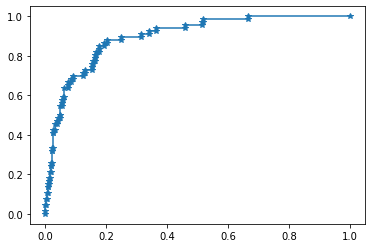

0.8966564377956783


In [37]:
clf1.fit(X_train, y_train)
y_pre = clf1.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = metrics.roc_curve(y_test,
                                          y_pre)
plt.plot(fpr,tpr,marker = '*')
plt.show()

auc_score1 = metrics.roc_auc_score(y_test,y_pre)
print(auc_score1)

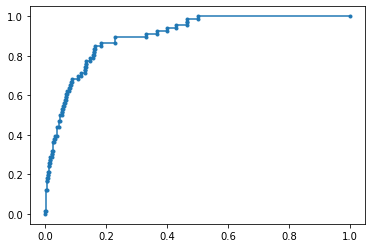

0.9005082470272343


In [38]:
clf2.fit(X_train, y_train)
y_pre = clf2.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = metrics.roc_curve(y_test,
                                          y_pre)
plt.plot(fpr,tpr,marker = '.')
plt.show()

auc_score1 = metrics.roc_auc_score(y_test,y_pre)
print(auc_score1)